<a href="https://colab.research.google.com/github/PeteCrowley/MachineLearning/blob/main/MnistSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Recognition
===

This notebook will create a convolutional and a dense neural network to classify images in the mnist datasets.

In [40]:
# Keras to create the neural network
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Helper Functions for Visualization
def show_min_max(array, i):
  random_image =array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

IMG_ROWS, IMG_COLS = 28, 28
NUM_CLASSES = 10

# Loading in Data
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(test_images.shape[0], IMG_ROWS, IMG_COLS, 1)
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

train_labels = keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NUM_CLASSES)


In [2]:
# Convolutional Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

EPOCHS = 1
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=EPOCHS, shuffle=True)
scores = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Accuracy: {scores[1]}")
model.save('cnn_mnist.h5')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                8

In [3]:
# Dense Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

EPOCHS = 10
model = Sequential()

model.add(Flatten(input_shape=INPUT_SHAPE))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=EPOCHS, shuffle=True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc}")

model.save('dnn_mnist.h5')

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4078 - accuracy: 0.8874
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2352 - accuracy: 0.9330
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1957 - accuracy: 0.9449
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1737 - accuracy: 0.9497
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1587 - accuracy: 0.9537
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1470 - accuracy: 0.9574
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1381 - accuracy: 0.9599
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1309 - accuracy: 0.9617
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1251 - accuracy: 0.9636
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.120

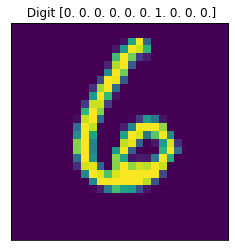

Prediction: 6


In [57]:
from keras.models import load_model
model = load_model("cnn_mnist.h5")

choice = np.random.randint(0, len(test_images))
plot_image(test_images, choice, test_labels)

prediction = model.predict(np.array([test_images[choice]]))
max_value = max(prediction[0])
max_index = np.where(prediction[0] == max_value)


print(f'Prediction: {max_index[0][0]}')